# Tratamento de dados output BoltzTraP

## Entendendo a estrutura do output do BoltzTraP

A dissertação pode ser encontrada em: https://repositorio.unicamp.br/acervo/detalhe/1141288?guid=1650155743107&returnUrl=%2fresultado%2flistar%3fguid%3d1650155743107%26quantidadePaginas%3d1%26codigoRegistro%3d1141288%231141288&i=2

O objetivo final é criar relações para a figura de mérito.

Para isso já foram feitos os cálculos de estrutura eletrônica e os cálculos de transporte eletrônico usando da Equação de Boltzmann na aproximação do tempo de relaxação. (Não vou entrar em detalhes aqui, detalhes podem ser encontrados na dissertação)

O output do BTP que nos interessa é o .condtens, nesse caso, chamado de as2se3.condtens. 

In [1]:
!du -sh /home/murilo/Doutorado/TESTE/full_comp/as2se3.condtens

20G	/home/murilo/Doutorado/TESTE/full_comp/as2se3.condtens


In [2]:
!head /home/murilo/Doutorado/TESTE/full_comp/as2se3.condtens -n 2

#       Ef[Ry] T [K]            N         cond(x,x')                                                                                                                                  seebeck(x,x')                                                                                                                                   kappa0(x,x')
  -0.40343    1.0000     72.00008282  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00


In [3]:
!tail /home/murilo/Doutorado/TESTE/full_comp/as2se3.condtens -n 2

   0.33991   69.0000    -31.99045317  0.92369285E+19 -0.95878938E+17 -0.53914166E+18 -0.95878938E+17  0.77798110E+19 -0.14739941E+18 -0.53914166E+18 -0.14739941E+18  0.10287683E+20  0.59670595E-04 -0.90817954E-07 -0.65172423E-06 -0.11424050E-06  0.55908538E-04 -0.15588945E-06 -0.82364598E-06 -0.16874063E-06  0.58000469E-04  0.17627424E+14 -0.19404805E+12 -0.91957579E+12 -0.19404805E+12  0.15218212E+14 -0.26708734E+12 -0.91957579E+12 -0.26708734E+12  0.19385578E+14
   0.33991   70.0000    -31.99040810  0.92488228E+19 -0.96095647E+17 -0.53946841E+18 -0.96095647E+17  0.77923884E+19 -0.14756036E+18 -0.53946841E+18 -0.14756036E+18  0.10299657E+20  0.60330323E-04 -0.86935148E-07 -0.64609080E-06 -0.11068878E-06  0.56567933E-04 -0.14847297E-06 -0.81724330E-06 -0.15906118E-06  0.58659108E-04  0.17952411E+14 -0.19747241E+12 -0.92884753E+12 -0.19747241E+12  0.15503106E+14 -0.27084949E+12 -0.92884753E+12

O arquivo possui 30 colunas, sendo:


-- Potencial Químico [$\mu$] (Ry)

-- Temperatura [T] (K)

-- Condutividade elétrica por tempo de realaxação [$\sigma / \tau$] (1/$\Omega m s$)

-- Coeficiente Seebek [S] (V/K)

-- Contutividade Térmica por tempo de realaxação [$\kappa^0 / \tau$] (1/$\Omega m s$)


Onde os três último são tensores 3x3. As componentes aparecem na ordem:

xx, xy, xz, yx, yy, yz, zx, zy, zz


Por fim, os tensores foram calculados em um grid de temperaturas e potencial químico de:

range(1, 601, 1) X range(-0.40343, 0.33992, 0.00001)



**Ainda, temos um detalhe importante: o arquivo possui 20 Gb+ e dessa forma, Não consiguirei carregá-lo em, por exemplo, um único DataFrame Pandas. Vou fazer um tratamento usando Python puro e tentar não carregar o arquivo na memória.**

Rapidamente sobre a Física do problema:

## Dependencia da figura de mérito com o Potencial Químico e com Tempo de relaxação eletrônico *

Existem duas linhas de trabalho distintas na dissertação:

A parte comum é o programa "1_resume_condtens_kappa_corrigido.py", o que esse programa faz é ler o output
do BoltzTraP e filtrar somente o range de potencial químico de interesse, bem como as colunas de interesse.

Nesse notebook vamos focar na segunda linha.
	
Lembre: O boltztrap calcula os coeficientes de transporte com uma dependencia em 3 parâmetros, 
	são eles: potencial quimico, temperatura e tempos de relaxação.
	O que eu faço nessa linha de trabalho é fixar a temperatura e analisar como os coeficientes de transporte se comportam como uma função do potencial quimico e tempos de relaxação, supondo, é claro, que esses são independentes entre si.
    

* Temperatura e tempos de relaxação obviamente são relacionados. Essa suposição é feita pois temos motivos pra acreditar que, nos dados experimentais disponíveis, a maior parte dos baixíssimos tempos de relaxação obtidos no método semi-empírico seja justificada por impurezas incorporadas na amostra durante o crescimento dos cristais, e, no caso em que essas possam ser evitadas com métodos mais modernos, esses tempos podem ser aumentados para uma mesma temperatura.


FIM DA FISICA

Para seguir, vamos então trabalhar nesse arquivo para deixar as coisas mais simples:

Primeiro: Como estamos interessados em investigar o efeito de pequenas dopagens nas propriedades termoelétrica do as2se3, vamos diminuir esse range de potenciais químicos. Já vamos aproveitar esse processamento para converter esses valores para Ev. Vamos tomar os valores de potencial químico no intervalo -2 a 3 eV.
Além disso, estamos numa aproximação semi-clássica, então vamos tomar os valores de temperatura acima de 260 K (abaixo disso já existem problemas de convergência).


In [4]:
'''
Primeiro programa no tratamento de dados!
Esse programa pega o arquivo as2se3.condtens que saiu do boltztrap, filtra os dados de interesse 
e faz a correção da condutividade térmica eletronica (Vide equação 6.6 da dissertação).
Os dados de interesse no arquivo .condtens são: ("$" representa a coluna).

  $1     $2   $3   $4        $8      $12    $13  $17  $21    $22       $26        $30   
Ef(Ry)  T(K)  N  sigma_a  sigma_b  sigma_c  S_a  S_b  S_c  kappa_0a  kappa_0b  kappa_0c

esse programa filtra o range de potquim de interesse convertendo para eV, e escreve os dados da seguinte forma:

  $1     $2      $3       $4      $5     $6   $7   $8      $9       $10       $11       $12         $13      $14      $15     $16     $17      $18       $19      $20
Ef(eV)  T(K)  sigma_a  sigma_b  sigma_c  S_a  S_b  S_c  kappa_ea  kappa_eb  kappa_ec  kappa_0a  kappa_0b  kappa_0c  Corr_a  Corr_b  Corr_c  kappa_la  kappa_lb  kappa_lc

onde Corr_i é a diferença entre kappa_0i e kappa_ei

'''
import numpy as np
from tqdm import tqdm


# LEITURA - dados calculados com o BoltzTraP
CAMINHO = "/home/murilo/Doutorado/TESTE/full_comp/as2se3.condtens"
Condtens = open(CAMINHO, 'r')

# ESCRITA - Arquivo onde ficarão os dados de interesse
ESCRITA = open('condtens_resumido_kappa_corrigido', 'w')

#Parâmetros de controle:
potquim_min_eV=-2
potquim_max_eV=3
u = u_min = round((potquim_min_eV / 13.605698066 - 0.003433), 5)
u_max = round((potquim_max_eV / 13.605698066 - 0.003433), 5)
du = 0.0001


#Programa principal
print(f'Porcentagem do arquivo já processada: \n')
with tqdm(total = 100) as barra_progresso:
    while u <= u_max:
        for j, linha_boltz in enumerate(Condtens):
            linha_boltz = linha_boltz.strip().split()
            if j > 0: #Só para pular o cabeçalho
                boltz = [float(i) for i in linha_boltz]
                
                # Parametros que vão ajudar na visualização do avançar do programa
                if j == 1 and u == u_min:
                    feito = np.linspace(boltz[0], u_max, 101)
                    atual = 0
                    
                #controle de quanto já foi executado
                if boltz[0] == round(float(feito[atual]), 5):
                    barra_progresso.update(1)
                    atual += 1
                    
                #Filtragem
                if u == boltz[0] and boltz[1] >= 260:
                    #variaveis
                    mu = round(((u + 0.003433) * 13.605698066), 5)
                    T = int(boltz[1])
                    sigma_a = boltz[3]
                    sigma_b = boltz[7]
                    sigma_c = boltz[11]
                    seebeck_a = boltz[12]
                    seebeck_b = boltz[16]
                    seebeck_c = boltz[20]
                    kappa_0_a = boltz[21]
                    kappa_0_b = boltz[25]
                    kappa_0_c = boltz[29]
                    correction_a = T * sigma_a * seebeck_a * seebeck_a
                    correction_b = T * sigma_b * seebeck_b * seebeck_b
                    correction_c = T * sigma_c * seebeck_c * seebeck_c
                    kappa_e_a = (boltz[21] - T * sigma_a * seebeck_a * seebeck_a)
                    kappa_e_b = (boltz[25] - T * sigma_b * seebeck_b * seebeck_b)
                    kappa_e_c = (boltz[29] - T * sigma_c * seebeck_c * seebeck_c)
                    kappa_l_a = 286.560013 / T + 0.01930183
                    kappa_l_b = 43.0359370 / T + 0.0027195
                    kappa_l_c = 398.038963 / T + 0.02291555
                    # Escrever dados
                    ESCRITA.write(f'{mu}\t{T}\t{sigma_a}\t{sigma_b}\t{sigma_c}\t{seebeck_a}\t{seebeck_b}\t{seebeck_c}\t{kappa_e_a}\t{kappa_e_b}\t{kappa_e_c}\t{kappa_0_a}\t{kappa_0_b}\t{kappa_0_c}\t{correction_a}\t{correction_b}\t{correction_c}\t{kappa_l_a}\t{kappa_l_b}\t{kappa_l_c}\n')
                    if T == 600:
                        break
        u += du
        u = round(u, 5)
ESCRITA.close()
Condtens.close()
%reset -f

  0%|                                                   | 0/100 [00:00<?, ?it/s]

Porcentagem do arquivo já processada: 



100%|█████████████████████████████████████████| 100/100 [04:15<00:00,  2.56s/it]


Eu já trouxe os resultados para a condutivade térmica da rede diretamente no código acima. Esses dados foram extraídos do trabalho do Robert.


Com esse arquivo gerado, podemos fazer uma análise da diferença entre kappa_0 e kappa_e. Aqui, vou seguir diretamente para o cálculo de ZT(tau, mu, T).


Para isso, pegamos os dados que vem do programa anterior (escritos em "condtens_resumido_kappa_corrigido" e calculamos ZT como função da temperatura, do potencial químico e dos tempos de relaxação que são gerados em um grid uniforme.


O arquivo de saída terá a sequinte estrutura:


coluna 0: tau(fs)

coluna 1: potquim(eV)

coluna 2: T(K)

coluna 3: ZT_a

coluna 4: ZT_b

coluna 5: ZT_c


Obs.: a, b e c são as direções cristalinas. (Vide dissertação).

In [5]:
import numpy as np

def calc_ZT_func_tau(tau_minimo, tau_maximo, tau_passo, TEMPERATURA, arquivo):
    Condtens = arquivo
    print("Calculando ZT...")
    # Parâmetros
    tau = tau_minimo
    tau_max = tau_maximo
    passo = tau_passo
    temperatura = TEMPERATURA

    data = []
    while tau <= tau_max:
        for linha in Condtens:
            if linha[1] == temperatura:
                mu = linha[0]
                T = int(linha[1])
                sigma_a = tau * 1e-15 * linha[2]
                sigma_b = tau * 1e-15 * linha[3]
                sigma_c = tau * 1e-15 * linha[4]
                seebeck_a = linha[5]
                seebeck_b = linha[6]
                seebeck_c = linha[7]
                kappa_e_a = tau * 1e-15 * linha[8]
                kappa_e_b = tau * 1e-15 * linha[9]
                kappa_e_c = tau * 1e-15 * linha[10]
                kappa_l_a = 286.560013 / T + 0.01930183
                kappa_l_b = 43.0359370 / T + 0.0027195
                kappa_l_c = 398.038963 / T + 0.02291555
                zT_a = (seebeck_a * seebeck_a * sigma_a * T) / (kappa_e_a + kappa_l_a)
                zT_b = (seebeck_b * seebeck_b * sigma_b * T) / (kappa_e_b + kappa_l_b)
                zT_c = (seebeck_c * seebeck_c * sigma_c * T) / (kappa_e_c + kappa_l_c)
                _ = []
                _.append(tau)
                _.append(mu)
                _.append(T)
                _.append(zT_a)
                _.append(zT_b)
                _.append(zT_c)
                data.append(_)
        tau += passo
        tau = round(tau, 3)
    return data


def escreve_dados(dados):
    ZT_ke = open('./ZT_calculado', 'w')
    print("Escrevendo resultados...")
    for i in dados:
        for j in i:
            ZT_ke.write(f"{j}\t")
        ZT_ke.write(f"\n")
    ZT_ke.close()


print("Carregando dados...")
CONDTENS = open('condtens_resumido_kappa_corrigido', 'r')
Condtens = []
for j, coluna in enumerate(CONDTENS):
    coluna = [float(i) for i in coluna.strip().split()]
    Condtens.append(coluna)

data = calc_ZT_func_tau(1, 16, 0.05, 600, Condtens)

escreve_dados(data)
print("Concluído!")
%reset -f

Carregando dados...
Calculando ZT...
Escrevendo resultados...
Concluído!


Por fim, podemos plotar os dados

Carregando dados...
Criando figura...


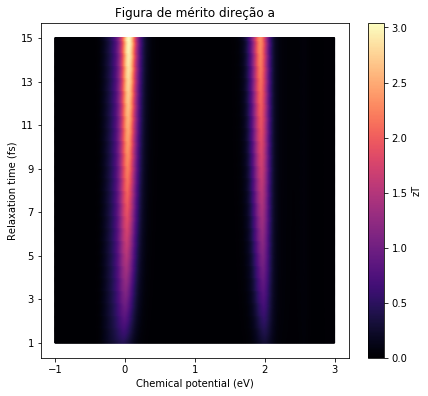

Criando figura...


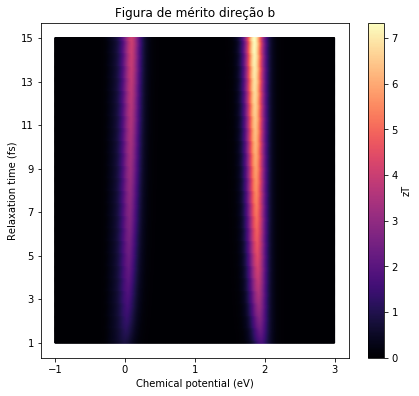

Criando figura...


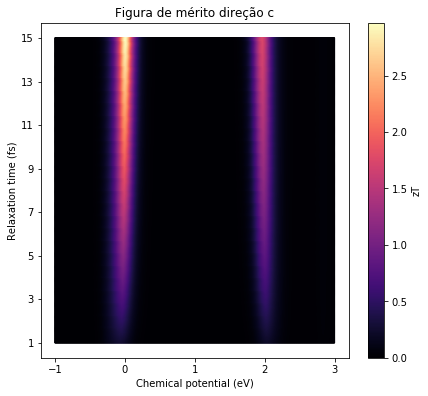

Done!


In [9]:
import matplotlib.pyplot as plt


def plot_ZT(direcao_data, direcao_name,  X = x, Y = y):
    """A direção deve ser a, b ou c"""
    
    print('Criando figura...')
    fig = plt.figure(figsize=(6, 6))
    plt.subplots_adjust(top=0.9, bottom=0.125, left=0.11, right=1.0, hspace=0.2, wspace=0.2)
    
    plt.scatter(X, Y, c=direcao_data, cmap='magma', vmin=0, s=0.1)
    
    plt.ylabel("Relaxation time (fs)")
    plt.xlabel("Chemical potential (eV)")
    plt.yticks([1,3,5,7,9,11,13,15])
    plt.xticks([-1,0,1,2,3])
    plt.title("Figura de mérito direção"+" "+direcao_name)
    
    plt.colorbar(label='zT')
    plt.show()
#    print(f'Salvando figura...')
#    name = "direção"+direcao_name
#    plt.savefig(fname=name, format='png', dpi=150)
    return None



arquivo = open('./ZT_calculado', 'r')
x = []
y = []
a = []
b = []
c = []
print(f'Carregando dados...')
for coluna in arquivo:
    coluna = [float(i) for i in coluna.strip().split()]
    if coluna[0] <= 15 and coluna[1] >= -1:
        x.append(coluna[1])
        y.append(coluna[0])
        a.append(coluna[3])
        b.append(coluna[4])
        c.append(coluna[5])


plot_ZT(a, "a")
plot_ZT(b, "b")
plot_ZT(c, "c")


print(f'Done!')
